## Importing All Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
# from keras_tuner import RandomSearch
# import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline
import pytz

## Importing Dataset i.e. GOOGLE (GOOGL) Stock Price Dataset

In [3]:
end_date = datetime.now(pytz.UTC).strftime('%Y-%m-%d')
df = yf.download('GOOGL', start='2004-08-19', end=end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730976,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044


In [5]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2024-11-18 00:00:00+00:00,175.300003,175.300003,175.440002,172.899994,173.419998,20206600
2024-11-19 00:00:00+00:00,178.119995,178.119995,178.869995,173.559998,173.720001,23434900
2024-11-20 00:00:00+00:00,175.979996,175.979996,177.679993,173.779999,177.339996,18997100
2024-11-21 00:00:00+00:00,167.630005,167.630005,174.130005,163.699997,173.899994,59734400
2024-11-22 00:00:00+00:00,164.759995,164.759995,166.460007,163.899994,165.850006,38560400


### Dropping the multilevel columns names

In [6]:
df.columns = df.columns.get_level_values(0)

In [7]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730976,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044
...,...,...,...,...,...,...
2024-11-18 00:00:00+00:00,175.300003,175.300003,175.440002,172.899994,173.419998,20206600
2024-11-19 00:00:00+00:00,178.119995,178.119995,178.869995,173.559998,173.720001,23434900
2024-11-20 00:00:00+00:00,175.979996,175.979996,177.679993,173.779999,177.339996,18997100


In [8]:
df.duplicated().sum()

0

## Copying the dataset for future use

In [9]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

### Dropping unwanted column

In [11]:
df.drop(['Adj Close'], axis=1, inplace=True)

In [12]:
df

Price,Close,High,Low,Open,Volume
0,2.511011,2.604104,2.401401,2.502503,893181924
1,2.710460,2.729730,2.515015,2.527778,456686856
2,2.737738,2.839840,2.728979,2.771522,365122512
3,2.624374,2.792793,2.591842,2.783784,304946748
4,2.652653,2.702703,2.599600,2.626627,183772044
...,...,...,...,...,...
5097,175.300003,175.440002,172.899994,173.419998,20206600
5098,178.119995,178.869995,173.559998,173.720001,23434900
5099,175.979996,177.679993,173.779999,177.339996,18997100
5100,167.630005,174.130005,163.699997,173.899994,59734400


### Splitting into features and target

In [13]:
features = df[['Open', 'High', 'Low', 'Volume']]
target = df[['Close']]

### Scaling the features

In [14]:
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

# Scale the features (Open, High, Low, Volume)
scaled_features = scaler_features.fit_transform(features)

# Scale the target (Close)
scaled_target = scaler_target.fit_transform(target)

### Convert to DataFrame to maintain indices

In [15]:
# Combine the scaled features and scaled target into a new DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low', 'Volume'])
scaled_data['Close'] = scaled_target  # Use the scaled Close values as the target

### Function to create sequences

In [16]:
sequence_length = 30
X = []
y = []
target_index = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[['Open', 'High', 'Low', 'Volume']].values[i-sequence_length:i])
    y.append(scaled_data['Close'].values[i])
    target_index.append(i)  # store index of each target value

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

### Splitting the data into train and test set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
_, y_test_indices = train_test_split(target_index, test_size=0.2, random_state=42)

### Model Building using CNN

In [18]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Single output for regression
])

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# 4. Train the Model
start = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
end = time.time()
print('Training Time:', end - start)

Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0035 - mae: 0.0351 - mse: 0.0035 - val_loss: 2.4408e-04 - val_mae: 0.0092 - val_mse: 2.4408e-04
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0014 - mae: 0.0225 - mse: 0.0014 - val_loss: 5.4439e-04 - val_mae: 0.0130 - val_mse: 5.4439e-04
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0011 - mae: 0.0199 - mse: 0.0011 - val_loss: 3.2637e-04 - val_mae: 0.0115 - val_mse: 3.2637e-04
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0011 - mae: 0.0189 - mse: 0.0011 - val_loss: 4.0390e-04 - val_mae: 0.0129 - val_mse: 4.0390e-04
Epoch 5/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0011 - mae: 0.0197 - mse: 0.0011 - val_loss: 6.2002e-04 - val_mae: 0.0160 - val_mse: 6.2002e-04
Epoch 6/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0013 - mae: 0.0229 - mse: 0.0013 - val_loss: 2.2817e-04 - val_mae: 0.0089 - val_mse: 2.2817e-04
Epoch 7/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 5s 11m

In [20]:
# Make predictions on the test set
predictions = model.predict(X_test)
predictions.flatten()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([0.06516626, 0.19964264, 0.00333023, ..., 0.33651215, 0.18244043,
       0.8247756 ], dtype=float32)

In [21]:
y_test

array([0.06129284, 0.19215485, 0.00961464, ..., 0.3383834 , 0.16723928,
       0.81354406])

In [22]:
y_pred_inv = scaler_target.inverse_transform(predictions)
y_test_inv = scaler_target.inverse_transform(y_test.reshape(-1, 1))

In [23]:
prediction = pd.DataFrame({'Actual': y_test_inv.flatten(), 'Predicted': y_pred_inv.flatten()}, index=y_test_indices)
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-10-13 00:00:00+00:00,3.526026,2.519234
2004-10-19 00:00:00+00:00,3.702202,2.625970
2004-10-26 00:00:00+00:00,4.549550,2.711679
2004-10-28 00:00:00+00:00,4.837337,2.807476
2004-11-03 00:00:00+00:00,4.796547,2.809989
...,...,...
2024-10-22 00:00:00+00:00,165.139999,163.740829
2024-11-07 00:00:00+00:00,180.750000,168.536560
2024-11-14 00:00:00+00:00,175.580002,173.286972


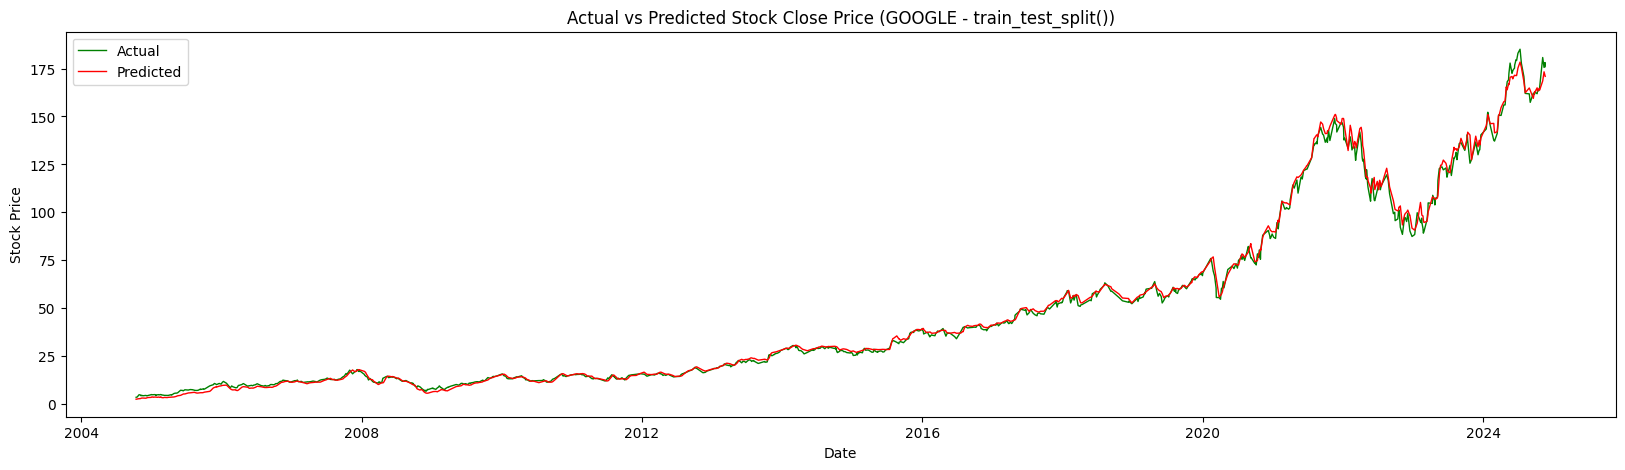

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.title('Actual vs Predicted Stock Close Price (GOOGLE - train_test_split())')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


## Calculating the Performance Evaluation Metrics

In [25]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.00015378965259186918
Root Mean Squared Error: 0.012401195611386395
Mean Absolute Error: 0.008027132147628601


In [26]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 5.4747722456261565
Root Mean Squared Error: 2.3398231227223474
Mean Absolute Error: 1.5145370532726419
